In [59]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from pprint import pprint


In [66]:
data = pd.read_csv("haberman.csv")      #Importing data
data2 = data.rename_axis().values       #pandas df to multidim array. Why? Cuz I liked it
print(data2)
print(len(data2))

[[30 64  1  1]
 [30 62  3  1]
 [30 65  0  1]
 ...
 [77 65  3  1]
 [78 65  1 -1]
 [83 58  2 -1]]
306


In [88]:
X_train, X_test = tts(data2, test_size=0.33, random_state=42)       #Splittng
print(len(X_train))
print(len(X_test))

205
101


In [111]:
def percep(data,epoch):    
    w = [0,0,0]
    bias = 1
    thresh = 0
    g = 0
    lr = 0.5

    while g < epoch:
        for j in range(len(data)):
            sum = 0
            out = 0
            
            for k in range(len(data[0])-1):
                sum = sum + data[j][k]*w[k]
            out = sum + bias
            if out > thresh:
                tempy = 1
            else:
                tempy = -1
            if tempy != data[j][3]:
                for m in range(len(data[0])-1):
                    w[m] = w[m] + lr*data[j][m]*data[j][3]
                bias = bias + lr*data[j][3]
        g = g+1

    return w,bias

w,b = percep(X_train,100)
print(w)
print(b)

def toTest(testdata,w,b):
    thresh = 0
    count = 0
    for i in range(len(testdata)):
        sum = 0
        out = 0
        for j in range(len(testdata[0])-1):
            sum = sum + testdata[i][j]*w[j]
        out = sum + b 
        if out > thresh:
            tempy = 1
        else:
            tempy = -1
        if tempy == testdata[i][3]:
            count = count + 1

    return (count/len(testdata))

accuracy = toTest(X_test,w,b)

print(f"Accuracy : {accuracy*100} %")

        









[-62.5, 96.5, -96.5]
-12.5
Accuracy : 74.25742574257426 %


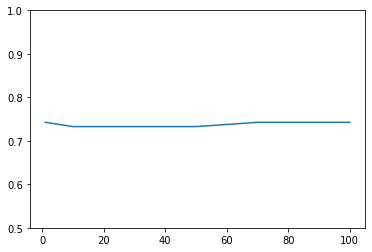

In [115]:
epoch = [1,10,20,50,70,100]
accuracy_arr = []
for i in epoch:
    w,b = percep(X_train,i)
    acc = toTest(X_test,w,b)
    accuracy_arr.append(acc)

plt.plot(epoch,accuracy_arr)
plt.ylim(0.5,1)
plt.show()

    